In [1]:
#import pandas to read the csv file

import pandas as pd

filename = 'medical_clean.csv'
mrd = pd.read_csv(filename)
mrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [2]:
#drop all irrelevant columns for our task
#get info for remaining columns

mrd_clean = mrd.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng',
                      'Population', 'Area', 'TimeZone', 'Job', 'ReAdmis', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten',
                      'vitD_supp', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes',
                      'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services',
                      'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
                      'Item6', 'Item7', 'Item8'], axis = 1)
mrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Children           10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Income             10000 non-null  float64
 3   Marital            10000 non-null  object 
 4   Gender             10000 non-null  object 
 5   Complication_risk  10000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 468.9+ KB


In [3]:
#verify no missing values in our initial variable set

mrd_clean.isnull().sum()

Children             0
Age                  0
Income               0
Marital              0
Gender               0
Complication_risk    0
dtype: int64

In [4]:
#import stats for outlier detection
#import seaborn to visualize outliers
#do this for continuous variables

from scipy import stats
import seaborn as sb

mrd_clean['zscore_children'] = stats.zscore(mrd_clean['Children'])
sum((mrd_clean.zscore_children < - 3) | (mrd_clean.zscore_children > 3))

202

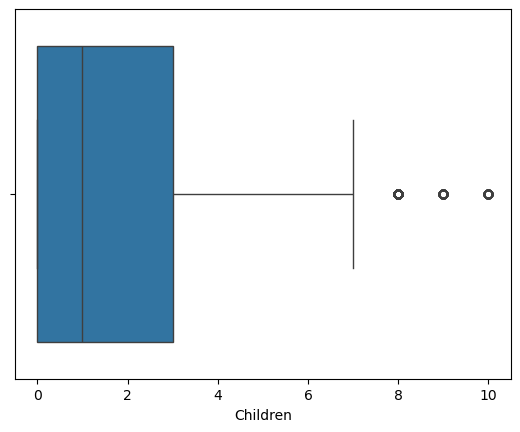

In [5]:
out = sb.boxplot(x = 'Children', data = mrd_clean)

In [6]:
mrd_clean['zscore_age'] = stats.zscore(mrd_clean['Age'])
sum((mrd_clean.zscore_age < - 3) | (mrd_clean.zscore_age > 3))

0

In [7]:
mrd_clean['zscore_income'] = stats.zscore(mrd_clean['Income'])
sum((mrd_clean.zscore_income < - 3) | (mrd_clean.zscore_income > 3))

143

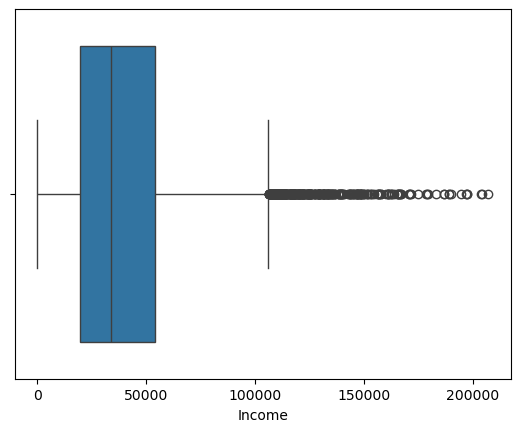

In [8]:
out = sb.boxplot(x = 'Income', data = mrd_clean)

In [9]:
#outliers are expected and will be retained
#drop the columns that were created
#verify we have only the columns we want for clustering

mrd_clean = mrd_clean.drop(['zscore_children', 'zscore_age', 'zscore_income'], axis = 1)
mrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Children           10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Income             10000 non-null  float64
 3   Marital            10000 non-null  object 
 4   Gender             10000 non-null  object 
 5   Complication_risk  10000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 468.9+ KB


In [10]:
#need to map variable Complication_risk since it contains non-numeric values

comp_risk_map = {'High':3, 'Medium':2, 'Low':1}
mrd_clean['Complication_risk'] = mrd_clean['Complication_risk'].map(comp_risk_map)
mrd_clean['Complication_risk'] = mrd_clean['Complication_risk'].astype(int)
print(mrd_clean['Complication_risk'])

0       2
1       3
2       2
3       2
4       1
       ..
9995    2
9996    2
9997    3
9998    2
9999    1
Name: Complication_risk, Length: 10000, dtype: int64


In [11]:
#check variable types to see what need re-expressed before clustering

print(mrd_clean.dtypes)

Children               int64
Age                    int64
Income               float64
Marital               object
Gender                object
Complication_risk      int64
dtype: object


In [12]:
#Marital and Gender still need to be encoded
#use get_dummies to do this

cat_cols = ['Marital', 'Gender']
mrd_clean = pd.get_dummies(mrd_clean, columns = cat_cols, drop_first = False)
mrd_clean = mrd_clean.astype(int)
mrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Children               10000 non-null  int64
 1   Age                    10000 non-null  int64
 2   Income                 10000 non-null  int64
 3   Complication_risk      10000 non-null  int64
 4   Marital_Divorced       10000 non-null  int64
 5   Marital_Married        10000 non-null  int64
 6   Marital_Never Married  10000 non-null  int64
 7   Marital_Separated      10000 non-null  int64
 8   Marital_Widowed        10000 non-null  int64
 9   Gender_Female          10000 non-null  int64
 10  Gender_Male            10000 non-null  int64
 11  Gender_Nonbinary       10000 non-null  int64
dtypes: int64(12)
memory usage: 937.6 KB


In [13]:
#rename columns

pythonic_cols = ['children', 'age', 'income', 'comp_risk', 'marital_d', 'marital_m', 'marital_nm', 'marital_s',
                 'marital_w', 'gender_f', 'gender_m', 'gender_nb']
mrd_clean = mrd_clean.set_axis(pythonic_cols, axis = 1)
mrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   children    10000 non-null  int64
 1   age         10000 non-null  int64
 2   income      10000 non-null  int64
 3   comp_risk   10000 non-null  int64
 4   marital_d   10000 non-null  int64
 5   marital_m   10000 non-null  int64
 6   marital_nm  10000 non-null  int64
 7   marital_s   10000 non-null  int64
 8   marital_w   10000 non-null  int64
 9   gender_f    10000 non-null  int64
 10  gender_m    10000 non-null  int64
 11  gender_nb   10000 non-null  int64
dtypes: int64(12)
memory usage: 937.6 KB


In [14]:
#now that the categorical variables have been properly encoded, continuous variables need scaled
#import StandardScaler
#verify the data looks as it should before clustering

from sklearn.preprocessing import StandardScaler

cont_cols = ['children', 'age', 'income']
scaler = StandardScaler()
mrd_clean[cont_cols] = scaler.fit_transform(mrd_clean[cont_cols])
mrd_clean.head()

,children,age,income,comp_risk,marital_d,marital_m,marital_nm,marital_s,marital_w,gender_f,gender_m,gender_nb
0,-0.507129,-0.024795,1.615899,2,1,0,0,0,0,0,1,0
1,0.417277,-0.121706,0.221426,3,0,1,0,0,0,1,0,0
2,0.417277,-0.024795,-0.915857,2,0,0,0,0,1,1,0,0
3,-0.969332,1.186592,-0.026263,2,0,1,0,0,0,0,1,0
4,-0.507129,-1.526914,-1.377327,1,0,0,0,0,1,1,0,0


In [15]:
#since everything looks good, export preprocessed data to its own csv file for submission

mrd_clean.to_csv('d212_task1.csv', index = False)

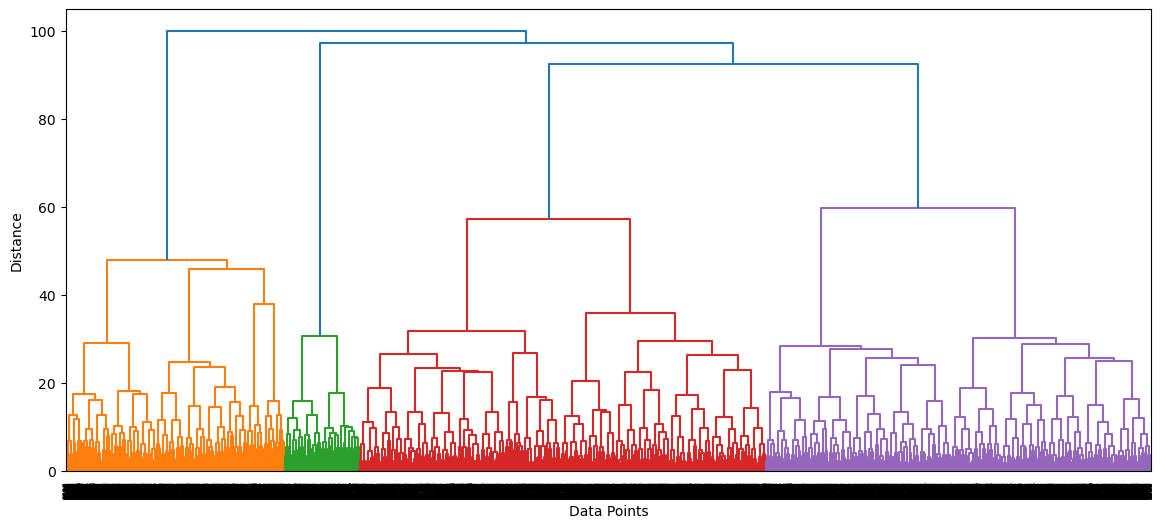

In [16]:
#import matplotlib for visualization purposes
#import linkage and dendrogram for clustering process
#use linkage to start hierarchical clustering using 'ward' method

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

dist_matrix = linkage(mrd_clean, method = 'ward')

plt.figure(figsize = (14,6))
mrd_dend = dendrogram(dist_matrix)
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [17]:
#import fcluster
#assign cluster labels

from scipy.cluster.hierarchy import fcluster

num_clusters = 3
mrd_clean['cluster_labels'] = fcluster(dist_matrix, num_clusters, criterion = 'maxclust')
print(mrd_clean['cluster_labels'].value_counts().sort_index())

cluster_labels
1    2019
2     686
3    7295
Name: count, dtype: int64


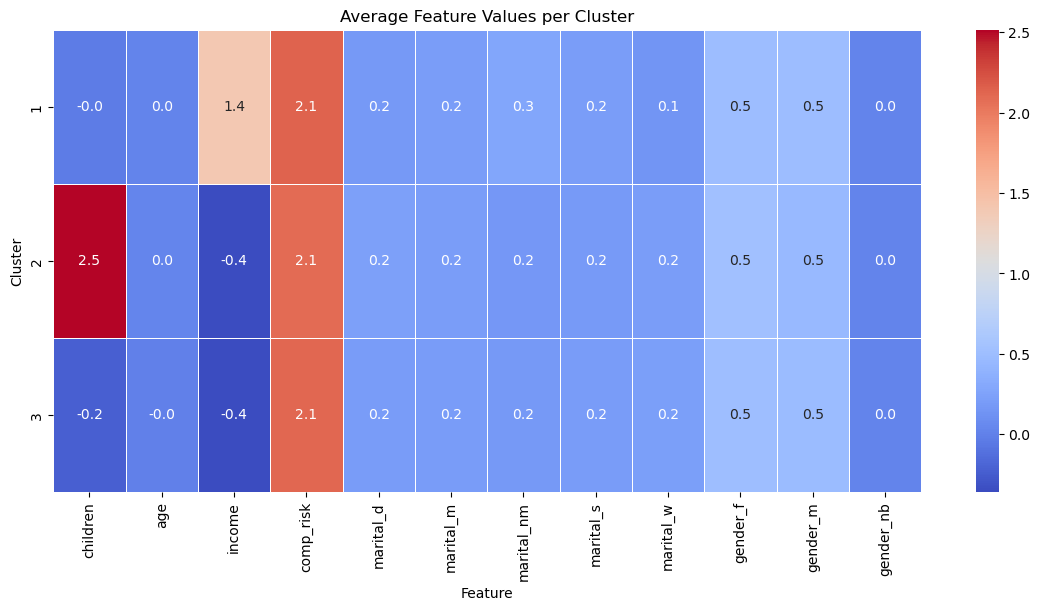

In [18]:
#create heatmap to show average feature values per cluster

cluster_means = mrd_clean.groupby('cluster_labels').mean()

plt.figure(figsize=(14, 6))
sb.heatmap(cluster_means, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)
plt.title("Average Feature Values per Cluster")
plt.xlabel("Feature")
plt.ylabel("Cluster")
plt.show()

In [19]:
#verify comp_risk mean due to lack of variance in heat map

import numpy as np

print(np.mean(mrd_clean['comp_risk']))

2.1233


In [20]:
#import silhouette score to evluate performance
#identify set of X and y variables for score
#run and print score

from sklearn.metrics import silhouette_score

X = mrd_clean[['children', 'age', 'income', 'marital_m', 'marital_d', 'marital_nm', 'marital_w', 'marital_s', 'gender_f',
              'gender_m', 'gender_nb', 'comp_risk']]
y = mrd_clean['cluster_labels']

model_score = silhouette_score(X, y, metric = 'euclidean')
print(model_score)

0.15815614075199483


In [21]:
#to visualize clusters, use t-SNE
#import TSNE
#using our parameters, run t-SNE

from sklearn.manifold import TSNE

tsne = TSNE(n_components = 3, random_state = 42)
X_tsne = tsne.fit_transform(X)

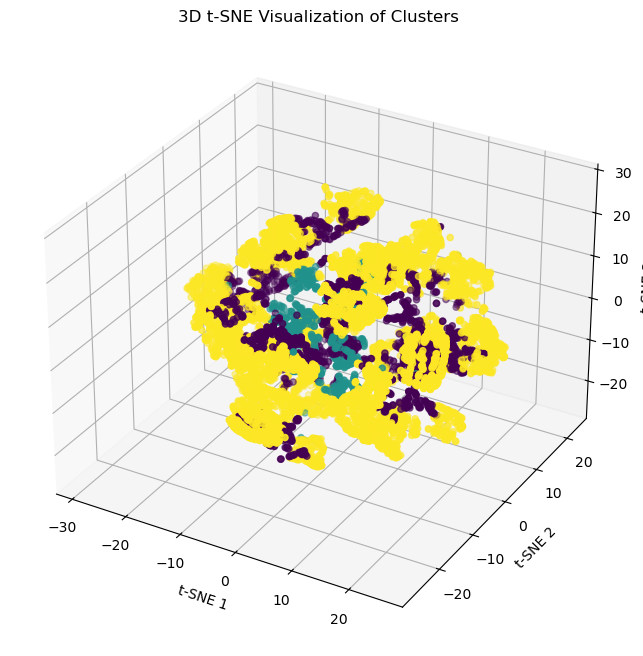

In [22]:
#to get a 3-D rendering, import Axes3D
#using our t-SNE from above, generate our clusters
#create graph and label

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=mrd_clean['cluster_labels'], cmap='viridis')

ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_zlabel('t-SNE 3')
plt.title('3D t-SNE Visualization of Clusters')
plt.show()